In [109]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [110]:
# importing the datset
data = pd.read_csv("loan.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3048\2391575818.py:2: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



In [111]:
data.shape

(39717, 111)

In [112]:
# finding the count of the null values are present in the dataset
null_data = data.isnull().sum()
null_data_dataset = pd.DataFrame({"Columns":null_data.index,"Counts":null_data.values})
px.histogram(data_frame=null_data_dataset,x="Columns",y="Counts")

## Data Cleaning and Preprocessing 

In [113]:
# Handle missing values
# in the daataset most columns has null values so we desided to eliminate it using dropna 
data.dropna(axis=1,inplace=True)

In [114]:
# checking that any null values still present in the dataset
data.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 

In [115]:
# Cheking the columns data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [116]:
data["annual_inc"]

0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 39717, dtype: float64

In [117]:
# deviding the dataset into tree parts object,int and float because of this tree dtype are most present in the dataset
object_dtype = data.select_dtypes(include=["object"])
int_dtype = data.select_dtypes(include=["int"])
float_dtype = data.select_dtypes(include=["float"])

## PERFORMING THE EDA IN object_dtype DATA

In [118]:
object_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   int_rate             39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   home_ownership       39717 non-null  object
 5   verification_status  39717 non-null  object
 6   issue_d              39717 non-null  object
 7   loan_status          39717 non-null  object
 8   pymnt_plan           39717 non-null  object
 9   url                  39717 non-null  object
 10  purpose              39717 non-null  object
 11  zip_code             39717 non-null  object
 12  addr_state           39717 non-null  object
 13  earliest_cr_line     39717 non-null  object
 14  initial_list_status  39717 non-null  object
 15  application_type     39717 non-null  object
dtypes: o

In [119]:
object_dtype.head()

,term,int_rate,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
0,36 months,10.65%,B,B2,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,Jan-85,f,INDIVIDUAL
1,60 months,15.27%,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,Apr-99,f,INDIVIDUAL
2,36 months,15.96%,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,Nov-01,f,INDIVIDUAL
3,36 months,13.49%,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,Feb-96,f,INDIVIDUAL
4,60 months,12.69%,B,B5,RENT,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,Jan-96,f,INDIVIDUAL


In [120]:
#converting the sates name from sortform to the name 
mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}
object_dtype["addr_state"] = object_dtype["addr_state"].map(mapping)

In [121]:
# removing the months from the term column aqnd converting it into int 
object_dtype["term"] = object_dtype["term"].str.replace("months","").astype("int")
object_dtype["term"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype
--------------  -----
39717 non-null  int32
dtypes: int32(1)
memory usage: 155.3 KB


In [122]:
# removing "%" from the int_rate column and converting it into float
object_dtype["int_rate"] = object_dtype["int_rate"].str.replace("%","").astype("float")
object_dtype["int_rate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [123]:
# applying the mapping on the home_ownership column

mapping = {
    
    'NONE':0,
    "OWN":1,
    "RENT":2,
    "MORTGAGE":3,
    "OTHER":4
}

object_dtype["home_ownership"] = object_dtype["home_ownership"].map(mapping)
object_dtype["home_ownership"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: home_ownership
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [124]:
object_dtype["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [125]:
# applying mapping on the column named verification_status 
# vefied:1 
# not verifie:0
# Source Verified:2

mapping = {
    "Verified":1,
    "Not Verified":0,
    'Source Verified':2
}
object_dtype["verification_status"] = object_dtype["verification_status"].map(mapping)
object_dtype["verification_status"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: verification_status
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [126]:
# Spliting the issue_d into issue_month and issue_year 
object_dtype[["issue_month","issue_year"]] =  object_dtype["issue_d"].str.split("-",expand=True)
object_dtype = object_dtype.drop(["issue_d"],axis=1)

In [127]:
object_dtype["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [128]:
# mapping the column named loan_status 
# fully paid:1
# charged off:0
# current : 2

mapping = {
    'Fully Paid':1,
    'Charged Off':0,
    'Current':2
}

object_dtype["loan_status"] = object_dtype["loan_status"].map(mapping)
object_dtype["loan_status"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [129]:
object_dtype["pymnt_plan"].unique()

array(['n'], dtype=object)

In [130]:
#droping the column named pymnt_plan because it had only n it indicate that there are no entery in it
object_dtype = object_dtype.drop(["pymnt_plan"],axis=1)


In [131]:
# droping the column name url that only gave the url so.
object_dtype = object_dtype.drop(["url"],axis=1)

In [132]:
# Spliting the data in column name earliest_cr_line
object_dtype[["earliest_cr_line_month","earliest_cr_line_year"]] = object_dtype["earliest_cr_line"].str.split("-",expand=True)


In [133]:
object_dtype["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

In [134]:
# applying mapping in column name Initial_list_status
object_dtype = object_dtype.drop(["application_type","initial_list_status"],axis=1)



In [135]:
int_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              39717 non-null  int64
 1   member_id       39717 non-null  int64
 2   loan_amnt       39717 non-null  int64
 3   funded_amnt     39717 non-null  int64
 4   delinq_2yrs     39717 non-null  int64
 5   inq_last_6mths  39717 non-null  int64
 6   open_acc        39717 non-null  int64
 7   pub_rec         39717 non-null  int64
 8   revol_bal       39717 non-null  int64
 9   total_acc       39717 non-null  int64
 10  policy_code     39717 non-null  int64
 11  acc_now_delinq  39717 non-null  int64
 12  delinq_amnt     39717 non-null  int64
dtypes: int64(13)
memory usage: 3.9 MB


In [136]:
len(int_dtype)


39717

In [137]:
# finding the duplicate enteries in "id" and "member_id"
int_dtype = int_dtype.drop_duplicates(subset=["id","member_id"])
int_dtype

,id,member_id,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,policy_code,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,0,1,3,0,13648,9,1,0,0
1,1077430,1314167,2500,2500,0,5,3,0,1687,4,1,0,0
2,1077175,1313524,2400,2400,0,2,2,0,2956,10,1,0,0
3,1076863,1277178,10000,10000,0,1,10,0,5598,37,1,0,0
4,1075358,1311748,3000,3000,0,0,15,0,27783,38,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,0,0,13,0,7274,40,1,0,0
39713,90665,90607,8500,8500,1,1,6,0,8847,9,1,0,0
39714,90395,90390,5000,5000,0,0,11,0,9698,20,1,0,0
39715,90376,89243,5000,5000,0,0,17,0,85607,26,1,0,0


Removing the Outliers

In [138]:
# Checking for null  values in 'funded_amnt' and 'loan_amnt' columns
print(f"null values in funded_amnt: {int_dtype['funded_amnt'].isnull().sum()}, null values in loan_amnt: {int_dtype['loan_amnt'].isnull().sum()}")


null values in funded_amnt: 0, null values in loan_amnt: 0


checking the numbers of null values are present in the data 

In [139]:
# List of columns to check for null values
columns_to_check = ["revol_bal",'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'policy_code', 'acc_now_delinq', 'delinq_amnt']

# Loop through each column and count null values
for column in columns_to_check:
    null_count = int_dtype[column].isnull().sum()
    print(f"Null values in {column}: {null_count}")


Null values in revol_bal: 0
Null values in delinq_2yrs: 0
Null values in inq_last_6mths: 0
Null values in open_acc: 0
Null values in pub_rec: 0
Null values in total_acc: 0
Null values in policy_code: 0
Null values in acc_now_delinq: 0
Null values in delinq_amnt: 0


performing concatenation

In [140]:
print(len(float_dtype),len(int_dtype),len(object_dtype))

39717 39717 39717


In [141]:
len(data)

39717

In [142]:
import pandas as pd

# Assuming your data is stored in a DataFrame called 'data'

# Define a function to remove outliers for a specific column using IQR
def remove_outliers_iqr(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to exclude rows outside the bounds
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data_filtered

# List of numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers for each numeric column
for column in numeric_columns:
    data = remove_outliers_iqr(column)

# Now, 'data' contains the data with outliers removed for all numeric columns


In [143]:
len(data)

17627

In [144]:
data = pd.concat([object_dtype,float_dtype,int_dtype],axis=1)


In [145]:
data["annual_inc"].isnull().sum()

0

In [146]:
data.head()

,term,int_rate,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state,...,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,policy_code,acc_now_delinq,delinq_amnt
0,36,10.65,B,B2,2,1,1,credit_card,860xx,Arizona,...,5000,0,1,3,0,13648,9,1,0,0
1,60,15.27,C,C4,2,2,0,car,309xx,Georgia,...,2500,0,5,3,0,1687,4,1,0,0
2,36,15.96,C,C5,2,0,1,small_business,606xx,Illinois,...,2400,0,2,2,0,2956,10,1,0,0
3,36,13.49,C,C1,2,2,1,other,917xx,California,...,10000,0,1,10,0,5598,37,1,0,0
4,60,12.69,B,B5,2,2,2,other,972xx,Oregon,...,3000,0,0,15,0,27783,38,1,0,0


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   term                     39717 non-null  int32  
 1   int_rate                 39717 non-null  float64
 2   grade                    39717 non-null  object 
 3   sub_grade                39717 non-null  object 
 4   home_ownership           39717 non-null  int64  
 5   verification_status      39717 non-null  int64  
 6   loan_status              39717 non-null  int64  
 7   purpose                  39717 non-null  object 
 8   zip_code                 39717 non-null  object 
 9   addr_state               39503 non-null  object 
 10  earliest_cr_line         39717 non-null  object 
 11  issue_month              39717 non-null  object 
 12  issue_year               39717 non-null  object 
 13  earliest_cr_line_month   39717 non-null  object 
 14  earliest_cr_line_year 

## Analyzing data to find insights 

1.Loan Default Rate by State

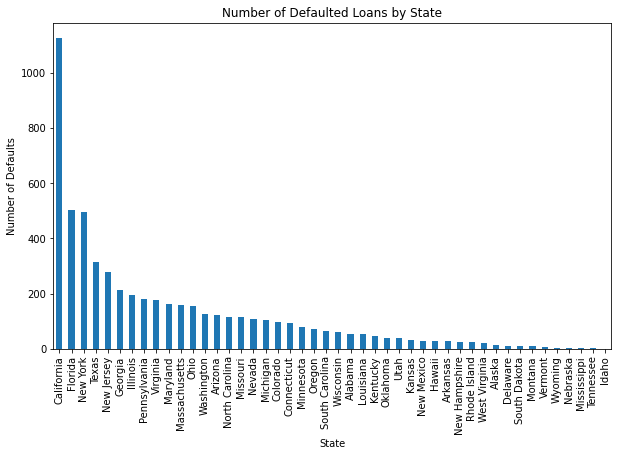

In [148]:

defaulted_loans = data[data["loan_status"]==0]
state_default_count = defaulted_loans["addr_state"].value_counts
# Create a bar chart
plt.figure(figsize=(10, 6))
state_default_count().plot(kind='bar')  # Call the function to generate the plot
plt.title('Number of Defaulted Loans by State')
plt.xlabel('State')
plt.ylabel('Number of Defaults')
plt.show()



In [149]:
# We can conclude from the given output data that California has the highest loan_deafault rate and Idaho has the lowest loan_deafault rate
state_default_count()

California        1125
Florida            504
New York           495
Texas              316
New Jersey         278
Georgia            215
Illinois           197
Pennsylvania       180
Virginia           177
Maryland           162
Massachusetts      159
Ohio               155
Washington         127
Arizona            123
North Carolina     114
Missouri           114
Nevada             108
Michigan           103
Colorado            98
Connecticut         94
Minnesota           81
Oregon              71
South Carolina      66
Wisconsin           63
Alabama             54
Louisiana           53
Kentucky            45
Oklahoma            40
Utah                40
Kansas              31
New Mexico          30
Hawaii              28
Arkansas            27
New Hampshire       25
Rhode Island        25
West Virginia       21
Alaska              15
Delaware            12
South Dakota        12
Montana             11
Vermont              6
Wyoming              4
Nebraska             3
Mississippi

2.Impact of Annual Income on Loan Amount: 

In [150]:
fig = px.scatter(data, x='annual_inc', y='loan_amnt', title='Impact of Annual Income on Loan Amount',
                 labels={'annual_inc': 'Annual Income', 'loan_amnt': 'Loan Amount'},
                 opacity=0.5)

fig.update_layout(
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray')
)

fig.show()

In [151]:
corr = data["annual_inc"].corr(data["loan_amnt"])
corr
# from the above data we can see that the the loan amount is not fully depended on the annual amount

0.2711485508165453

3. Loan Grade Analysis

In [152]:

# Group the data by loan grade and calculate the mean interest rate for each grade
grade_interest = data.groupby('grade')['int_rate'].mean().reset_index()

# Create a bar chart using Plotly
fig = px.bar(
    grade_interest,
    x='grade',
    y='int_rate',
    labels={'grade': 'Loan Grade', 'int_rate': 'Mean Interest Rate'},
    title='Loan Grade vs. Mean Interest Rate'
)

# Show the Plotly figure
fig.show()

# good grade had less amount of interest rate and poor grade had high amount of interest rate


4.Credit Grade vs. Interest Rate

In [153]:
fig = px.scatter(data, x='grade', y='int_rate', title='Credit Grade vs. Interest Rate')
fig.update_traces(marker=dict(size=5, opacity=0.5), selector=dict(mode='markers+lines'))
fig.update_layout(xaxis_title='Grade', yaxis_title='Interest Rate (%)')
fig.show()
# from the graph we can conclued that higer grade will had lower interest rate


5.Loan Performance by Loan Grade

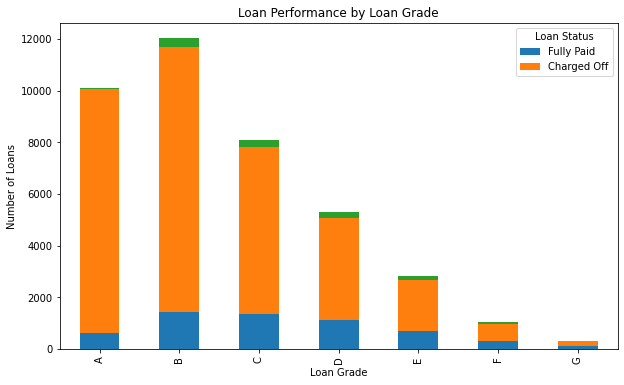

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with columns 'grade' and 'loan_status'

# Group the data by loan grade and loan status and calculate the count of each combination
loan_performance = data.groupby(['grade', 'loan_status']).size().unstack().fillna(0)

# Create a stacked bar chart to visualize loan performance by grade
loan_performance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.title('Loan Performance by Loan Grade')
plt.legend(title='Loan Status', loc='upper right', labels=['Fully Paid', 'Charged Off'])
plt.show()


6.Loan Term and Default Rate:

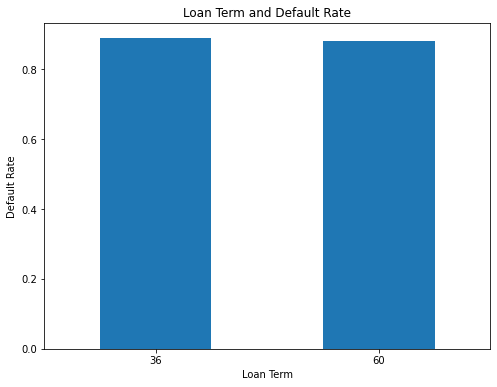

In [160]:
# Assuming you have a DataFrame 'data' with columns 'term' and 'loan_status'

# Group the data by loan term and calculate the default rate for each term
term_default_rate = data.groupby('term')['loan_status'].mean()

# Create a bar chart to visualize default rates by loan term
term_default_rate.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Loan Term')
plt.ylabel('Default Rate')
plt.title('Loan Term and Default Rate')
plt.xticks(rotation=0)
plt.show()

#from the given graph we can conclued that in both term there are same rate


7.Relationship between Loan Purpose and Interest Rates

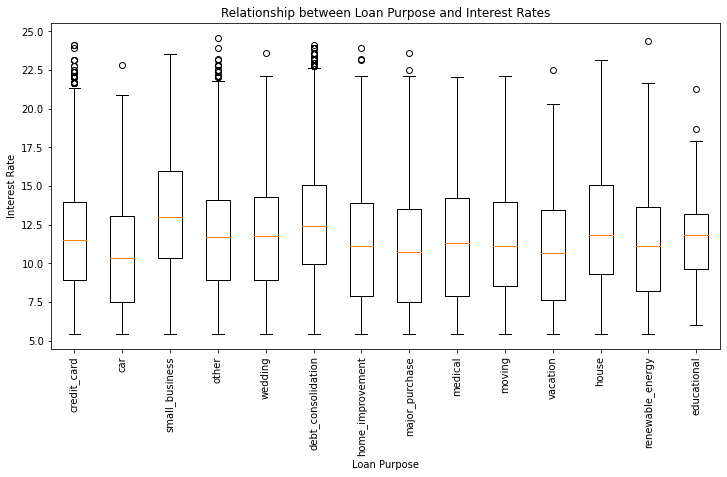

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with columns 'purpose' and 'int_rate'

# Create a box plot to visualize the relationship between loan purpose and interest rates
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Relationship between Loan Purpose and Interest Rates')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.boxplot([data[data['purpose'] == purpose]['int_rate'] for purpose in data['purpose'].unique()], labels=data['purpose'].unique())
plt.show()


8.Effect of Total Accounts on Loan Approval

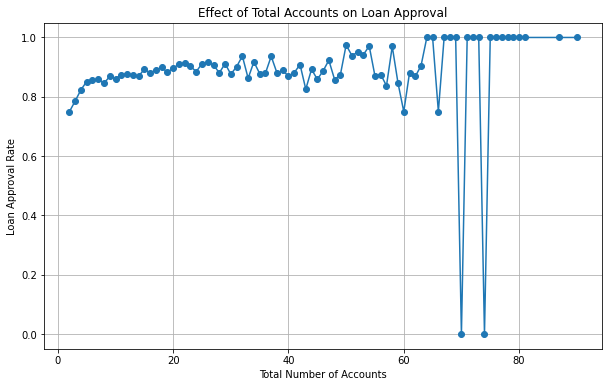

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with columns 'total_acc' and 'loan_status'

# Group the data by the total number of accounts and calculate the loan approval rate for each number of accounts
approval_rate_by_total_acc = data.groupby('total_acc')['loan_status'].mean()

# Create a line plot to visualize the relationship between the number of accounts and loan approval rate
plt.figure(figsize=(10, 6))
plt.plot(approval_rate_by_total_acc.index, approval_rate_by_total_acc, marker='o')
plt.xlabel('Total Number of Accounts')
plt.ylabel('Loan Approval Rate')
plt.title('Effect of Total Accounts on Loan Approval')
plt.grid(True)
plt.show()


In [169]:
data.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'issue_month', 'issue_year',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'policy_code', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

9.Analyzing the Relationship Between Loan Purposes and Loan Default Rates

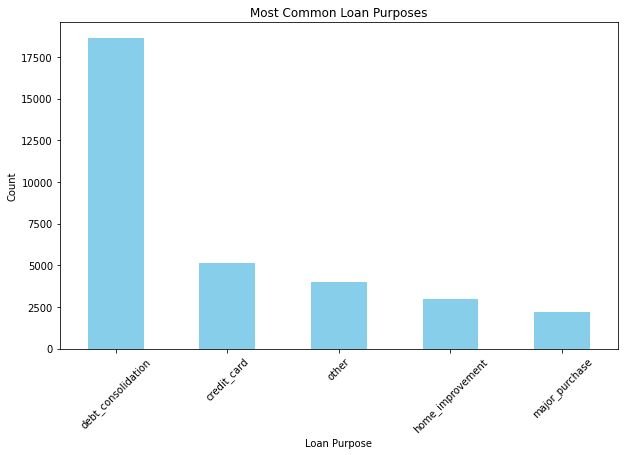

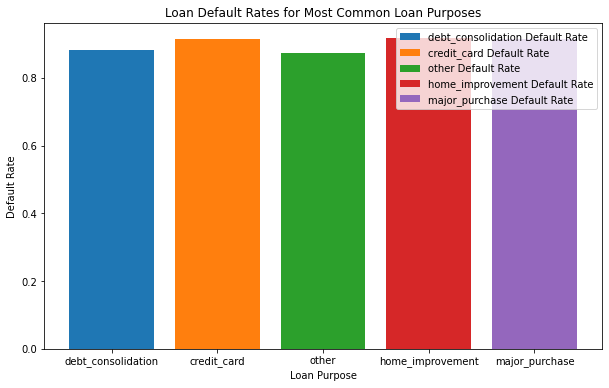

In [173]:

# Calculate the most common loan purposes
common_loan_purposes = data['purpose'].value_counts().head(5)

# Create a bar chart to visualize the most common loan purposes
plt.figure(figsize=(10, 6))
common_loan_purposes.plot(kind='bar', color='skyblue')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Most Common Loan Purposes')
plt.xticks(rotation=45)

# Calculate and visualize loan default rates for the most common loan purposes
plt.figure(figsize=(10, 6))
for purpose in common_loan_purposes.index:
    default_rate = data[data['purpose'] == purpose]['loan_status'].mean()
    plt.bar(purpose, default_rate, label=f'{purpose} Default Rate')

plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.title('Loan Default Rates for Most Common Loan Purposes')
plt.legend()
plt.show()


10.How does the type of home ownership influence loan default rates

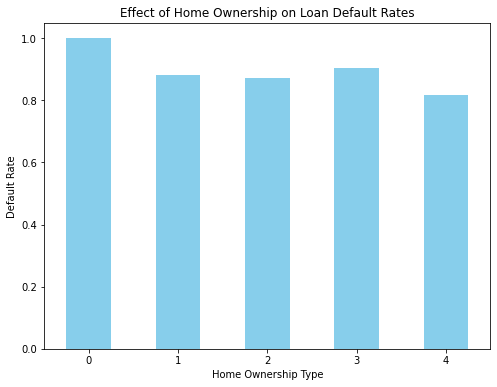

In [175]:
# 'NONE':0,
#     "OWN":1,
#     "RENT":2,
#     "MORTGAGE":3,
#     "OTHER":4

# Assuming you have a DataFrame 'data' with columns 'home_ownership' and 'loan_status'

# Calculate and visualize loan default rates for different types of home ownership
default_rates = data.groupby('home_ownership')['loan_status'].mean()

# Create a bar chart to show the relationship between home ownership and default rates
plt.figure(figsize=(8, 6))
default_rates.plot(kind='bar', color='skyblue')
plt.xlabel('Home Ownership Type')
plt.ylabel('Default Rate')
plt.title('Effect of Home Ownership on Loan Default Rates')
plt.xticks(rotation=0)
plt.show()
